# Analysis chemical dataset

# 1. Classification on the given dataset

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

The data given was<br/>
p1 = [1, 0.9, 1.1, 1, 1, 1, 6, 6.1, 6.2, 6, 6, 6, 6, 6, 6, 1, 0.1, 0.1, 0.1, 0.1]<br/>
p2 = [1, 1.5, 3, 1, 2, 2, 13, 12, 11, 12.5, 10, 14, 12, 12, 11, 1, 3, 1.5, 1, 2]<br/>
p3 = [1.1, 1.3, 0, 1, 1.1, 1.2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1.1, 2.1, 3.1, 0.1]<br/>
p4 = [5, 5, 5, 5, 5, 5, 6, 7, 2, 4, 5, 2, 7, 8, 4, 6, 5, 5, 6, 3]<br/>
p5 = [1, 1, 3, 1, 2, 1, 0.1, 0.1, 0.1, 0.1, 1, 1, 1, 20, 21, 21, 22.1, 19.1, 18.1, 16.1]<br/>
p6 = [23, 23, 23, 22.5, 21, 22.75, 25, 26, 24, 25, 27, 25, 21, 23, 1, 1, 0.1, 0.1, 0.1, 0.1]<br/>
p7 = [1, 1, 1, 1, 1, 1, 2.1, 1.3, 2.0, 0.5, 1, 1, 1, 1, 1, 1, 0.1, 0.1, 0.1, 0.1]<br/>

In [2]:
p1 = [1, 0.9, 1.1, 1, 1, 1, 6, 6.1, 6.2, 6, 6, 6, 6, 6, 6, 1, 0.1, 0.1, 0.1, 0.1]
p2 = [1, 1.5, 3, 1, 2, 2, 13, 12, 11, 12.5, 10, 14, 12, 12, 11, 1, 3, 1.5, 1, 2]
p3 = [1.1, 1.3, 0, 1, 1.1, 1.2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1.1, 2.1, 3.1, 0.1]
p4 = [5, 5, 5, 5, 5, 5, 6, 7, 2, 4, 5, 2, 7, 8, 4, 6, 5, 5, 6, 3]
p5 = [1, 1, 3, 1, 2, 1, 0.1, 0.1, 0.1, 0.1, 1, 1, 1, 20, 21, 21, 22.1, 19.1, 18.1, 16.1]
p6 = [23, 23, 23, 22.5, 21, 22.75, 25, 26, 24, 25, 27, 25, 21, 23, 1, 1, 0.1, 0.1, 0.1, 0.1]
p7 = [1, 1, 1, 1, 1, 1, 2.1, 1.3, 2.0, 0.5, 1, 1, 1, 1, 1, 1, 0.1, 0.1, 0.1, 0.1]
X = np.array([p1, p2, p3, p4, p5, p6, p7])


Use K-means clustering to label the data

In [3]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Labels vector:')
print(kmeans.labels_)
y = kmeans.predict(X)

Labels vector:
[1 1 1 1 0 2 1]


# 2. Generate more data from the given dataset

**To generate more data for training from the given data, first we should calculate *mean* and *standard*
of those data to find the statistical characteristics of them. Generated data will intuitively be around these points.**  

In [4]:
# Calculate mean and std of the given data
stat = []
for i in range(len(X)):
    stat_0 = []
    stat_0.append(np.array(X[i]).mean())
    stat_0.append(np.array(X[i]).std())
    stat.append(stat_0)
# Print [mean, sdt] calculated
print (stat)

[[3.0850000000000004, 2.686684760071415], [6.325, 5.165450125594091], [1.1050000000000002, 0.6070214164261423], [5.0, 1.4832396974191326], [7.489999999999999, 9.000216664058705], [16.682500000000005, 10.755780713179307], [0.9150000000000003, 0.531295586279427]]


Use K-means clustering to automatically label data when we add two more labels

In [6]:
kmeans_new = KMeans(n_clusters=5, random_state=0).fit(X)
y_new = kmeans_new.predict(X)
print (y_new)

[1 4 3 1 0 2 3]


As we observe above, the given dataset is too small to be grouped into 5 different clusters. Hence we will create more data from those by generating random vectors followed the normal distribution having Mean and Std calculated previously. Here we take the postive values with only one digit after decimal point which are similar to the given data.

In [7]:
X_norm = []

for i in range(200):
    X_norm.append(abs(np.around(np.random.normal(stat[0][0], stat[0][1], len(p1)),1)))
    X_norm.append(abs(np.around(np.random.normal(stat[1][0], stat[1][1], len(p1)),1)))
    X_norm.append(abs(np.around(np.random.normal(stat[2][0], stat[2][1], len(p1)),1)))
    X_norm.append(abs(np.around(np.random.normal(stat[3][0], stat[3][1], len(p1)),1)))
    X_norm.append(abs(np.around(np.random.normal(stat[4][0], stat[4][1], len(p1)),1)))

The expanded dataset now contains 1000 samples which have the similar statistical characteristics to the first seven data samples given. It's enough to group 5 clusters. Indeed, if we do K-means clustering again, we have

In [8]:
kmeans_norm = KMeans(n_clusters=5).fit(X_norm)
y_norm = kmeans_norm.predict(X_norm)
print ('Labels of new dataset')
print (y_norm)

Labels of new dataset
[2 3 0 2 3 2 3 0 2 1 2 3 0 2 3 2 3 0 2 4 2 2 0 2 3 2 3 0 2 3 2 3 0 2 1 2 3
 0 2 4 2 3 0 2 1 2 2 0 2 4 2 3 0 2 4 2 3 0 2 4 2 3 0 2 1 2 3 0 2 3 2 3 0 2
 4 0 2 0 2 1 2 3 0 2 1 2 2 0 2 1 2 3 0 2 3 2 4 0 2 3 2 4 0 2 1 0 4 0 2 4 0
 3 0 3 3 2 4 0 2 3 0 2 0 2 4 2 3 0 2 3 2 2 0 2 4 2 3 0 2 3 2 3 0 2 1 2 3 0
 2 4 2 3 0 2 3 2 3 0 2 3 2 3 0 2 4 2 3 0 2 3 2 3 0 2 1 2 3 0 2 1 0 3 0 2 3
 2 2 0 2 1 2 3 0 2 4 2 2 0 2 4 2 3 0 2 3 2 3 0 2 3 0 3 0 2 3 2 3 0 2 1 2 3
 0 2 1 0 3 0 2 3 2 2 0 2 1 2 3 0 2 4 2 2 0 2 3 2 3 0 2 3 2 3 0 2 3 2 3 0 2
 1 0 3 0 2 4 2 4 0 2 4 2 3 0 2 1 2 2 0 2 3 2 2 0 2 4 2 2 0 2 1 2 3 0 2 1 2
 2 0 2 1 2 3 0 2 3 2 3 0 2 4 2 3 0 2 4 2 3 0 2 4 0 3 0 2 3 0 3 0 2 1 2 2 0
 2 4 2 3 0 2 4 2 2 0 2 3 2 3 0 2 4 2 4 0 2 4 2 2 0 2 1 0 3 0 2 3 2 3 0 2 1
 0 3 0 2 1 2 4 0 2 1 2 3 0 2 4 2 3 0 2 3 2 3 0 2 4 2 2 0 2 4 2 3 0 2 1 2 3
 0 2 1 2 2 0 2 3 2 3 0 2 3 2 3 0 2 1 2 3 0 2 4 2 3 0 2 4 2 3 0 2 1 2 4 0 2
 1 2 2 0 2 4 2 2 0 2 3 0 2 0 2 3 2 3 0 2 4 2 3 0 2 4 0 3 0 2 4 2 3 0 2 3 2
 3 

To visualize the relationship between features of data and the labels, we put them into a dataframe.<br/>
As we can see, the new dataset also has 20 feautures and is distributed pretty the same with the first provided data.

In [9]:
import pandas as pd
from pandas.plotting import scatter_matrix

# First import obtained data as dataframe with features
data_norm = pd.DataFrame(X_norm , columns=['x1', 'x2', 'x3',\
                         'x4','x5','x6','x7','x8','x9','x10',\
                    'x11','x12','x13','x14','x15','x16','x17',\
                                             'x18','x19','x20'])
# Insert labels
data_norm['label'] = y_norm
# Display the first 10 rows
data_norm.head(n=10)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,label
0,0.8,7.3,3.0,2.5,2.6,5.2,0.2,2.2,0.7,5.7,...,3.4,0.8,2.9,1.0,4.2,5.9,0.5,4.0,2.7,2
1,4.2,0.4,7.4,4.0,5.4,1.2,1.6,4.1,3.9,2.9,...,9.3,12.8,10.5,1.2,10.1,10.1,1.9,9.0,5.6,3
2,1.0,1.7,0.7,0.6,1.2,0.7,1.4,1.5,1.7,0.1,...,0.9,1.4,1.1,0.3,2.2,0.4,1.0,1.5,0.9,0
3,2.9,5.0,6.5,5.1,6.1,4.3,6.2,6.2,3.8,3.6,...,6.0,4.9,4.6,3.1,7.1,8.1,4.7,3.5,6.6,2
4,4.4,10.9,4.6,9.9,8.4,3.8,11.9,16.2,4.7,8.6,...,8.6,6.1,4.5,4.3,0.4,24.8,3.6,0.6,8.8,3
5,3.7,2.0,4.3,4.9,5.4,4.0,1.7,4.7,2.7,1.7,...,0.3,6.4,4.9,2.7,0.7,2.5,1.5,5.6,2.2,2
6,12.6,3.3,16.2,2.7,3.3,9.7,10.8,12.7,2.8,5.8,...,6.0,3.4,9.4,4.8,3.4,9.3,18.7,0.1,11.0,3
7,0.7,0.1,0.3,0.9,0.7,0.9,1.1,1.6,1.1,0.6,...,2.3,0.8,1.1,0.5,0.3,1.3,0.7,1.1,1.0,0
8,6.1,3.6,5.1,4.9,2.5,6.4,7.5,2.5,5.1,3.1,...,5.4,4.8,6.3,5.7,4.3,5.7,5.6,2.2,5.8,2
9,12.9,21.2,4.8,17.1,19.6,23.0,5.0,15.8,18.0,14.6,...,20.0,8.4,15.0,26.2,2.1,3.1,18.5,12.6,2.0,1


For the sake of better visualization, we should display those data on the Cartesian coordinate system. Note that this coordinator only shows 2D points therefore we cannot draw on it for our dataset with 20-dimensional features. Fortunately, t-SNE can help us.

t-SNE is also a dimensionality reduction technique that facilitates better visualization for high dimensional data. However, different from PCA which is also an effective dimensionality reduction algorithm, t-SNE loses the global structure of the whole data, it only groups close neighbors into a cluster. Also for this reason, t-SNE is usually used as an excellent visualization method. 

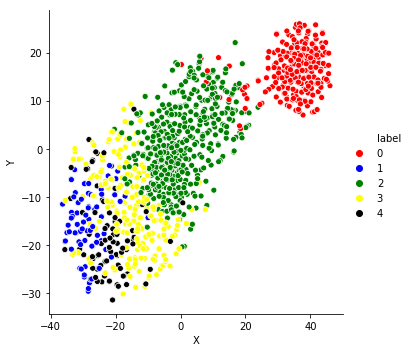

In [11]:
from sklearn.manifold import TSNE
import seaborn as sns
X_embedded = TSNE(n_components=2).fit_transform(X_norm)
tsne_df = pd.DataFrame({'X':X_embedded[:,0],
                        'Y':X_embedded[:,1],
                        'label':y_norm})
tSNE = sns.relplot(x="X", y="Y",
              hue="label",
              palette=['red','blue','green','yellow','black'],
              legend='full',
              data=tsne_df);
tSNE.savefig('tSNE_chem.eps', format='eps', dpi=600)

# 3. Implement Random Forest classification on extented dataset

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

Using 10-fold cross validation to avoid the overfitting problem.

In [15]:
rf = RandomForestClassifier(random_state=0)
rf_acc = cross_val_score(rf, X_norm, y_norm, cv=10).mean()
rf_f1 = cross_val_score(rf, X_norm, y_norm, cv=10, scoring='f1_macro').mean()
print ('Cross Validation Accuracy using Random Forest: ', "%.4f" % rf_acc)
print ('Cross Validation F-score using Random Forest: ', "%.4f" % rf_f1)

Cross Validation Accuracy using Random Forest:  0.8760
Cross Validation F-score using Random Forest:  0.7885


# Feature Selection 

**One of very important questions in our data is how important features are. More precisely, what kind of features that significantly contribute to classification performance? As such, feature selection is an effective way to facilitate the improvement in classification accuracy by choosing the most informative features/attributes. 
This work deploys two very common but formidable filter feature selection methods, they are Information Gain (IG) and Chi-square statistic (CHI). These methods are practically demonstrated in many applications in terms of avoiding overfitting and training time efficiency.**   

In [16]:
import sklearn
from info_gain import info_gain
from sklearn.feature_selection import chi2

In [17]:
X_norm = np.array(X_norm)
y_norm = np.array(y_norm)
def infor_gain(k,X,y):
    max_IG = []
    for i in range(X.shape[1]):
        feature = X[:,i]
        ig = info_gain.info_gain(y, feature)
        max_IG.append(ig)
    max_IG = np.array(max_IG)
    max_IG = max_IG.argsort()[-k:][::-1]
    return max_IG

def chi_square(k,X,y):
    chi = sklearn.feature_selection.chi2(X,y)
    max_CHI = chi[0].argsort()[-k:][::-1]
    return max_CHI

max_IG = infor_gain(20,X_norm,y_norm)
max_CHI = chi_square(20,X_norm,y_norm)
print ('Feature selection by Information Gain ordered by Importance:\n', max_IG)
print ('Feature selection by Chi-square ordered by Importance:\n', max_CHI)

Feature selection by Information Gain ordered by Importance:
 [12 13  5  3 11 15 16  6 14  4  7  0  2 17  1 19 18 10  9  8]
Feature selection by Chi-square ordered by Importance:
 [12  3 11 17  5 13 14  8  0  7 15  4 18  2  1  9  6 16 10 19]


The feature sets obtained by IG and CHI method above display the most important features by important order, which means the importance of a feature is followed by descending order (e.g. feature **x13** is more important than feature **x5** if using IG feature selection, while **x5** seems to be more important than feature **x13** when using CHI).

Now we investigate how feature selection affects the overall performance 

In [18]:
rf_acc_ig = []
rf_f1_ig = []
rf_acc_chi = []
rf_f1_chi = []
for i in range(1,X_norm.shape[1]+1):
    rf_acc_ig.append(cross_val_score(rf, X_norm[:,max_IG[0:i]], y_norm, cv=10).mean())
    rf_f1_ig.append(cross_val_score(rf, X_norm[:,max_IG[0:i],], y_norm, cv=10, scoring='f1_macro').mean())
    rf_acc_chi.append(cross_val_score(rf, X_norm[:,max_CHI[0:i]], y_norm, cv=10).mean())
    rf_f1_chi.append(cross_val_score(rf, X_norm[:,max_CHI[0:i]], y_norm, cv=10, scoring='f1_macro').mean())
    

In [19]:
import matplotlib.pyplot as plt
from matplotlib import pylab

In [20]:
flen = [i for i in range(1,X_norm.shape[1]+1)]
all_acc = []
all_f1 = []
for i in range((X_norm.shape[1])):
    all_acc.append(rf_acc)
    all_f1.append(rf_f1)

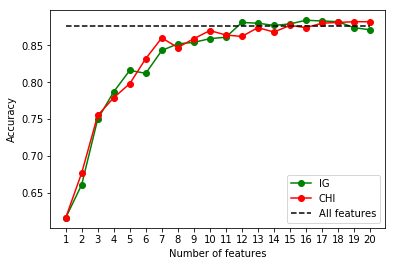

In [21]:
beingsaved = pylab.figure()
pylab.xticks(range(1,21))
pylab.plot(flen,rf_acc_ig, 'g-o',label='IG')
pylab.plot(flen,rf_acc_chi, 'r-o',label='CHI')
pylab.plot(flen,all_acc,'k--',label='All features')
pylab.legend(loc='lower right')
pylab.xlabel('Number of features')
pylab.ylabel('Accuracy')
pylab.show()

In [22]:
print ('Best accuracy by using IG: ', max(rf_acc_ig))
print ('Best accuracy by using CHI: ', max(rf_acc_chi))

Best accuracy by using IG:  0.884
Best accuracy by using CHI:  0.882


Figure above shows the 10-fold cross validation by accuracy. Note that we also compare the performance of IG and CHI with that of when using all features represented by the dashed line. As we can see, CHI performs better than IG in general. However, IG can achieve the best accuracy with 16 features. It means that we can eliminate 4 least important features (i.e. feature **[x18,x10,x9,x8]**) to get the best performance. In case we only need a relative accuracy, we can remove 10 least important features in the CHI set to get the same accuracy with when using all features (because as in the figures above, we only need 10 features when using CHI to be on par with *All feature* baseline).

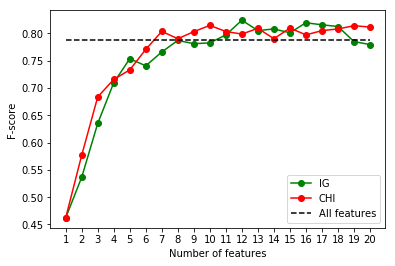

In [23]:
beingsaved = pylab.figure()
pylab.xticks(range(1,21))
pylab.plot(flen,rf_f1_ig, 'g-o',label='IG')
pylab.plot(flen,rf_f1_chi, 'r-o',label='CHI')
pylab.plot(flen,all_f1,'k--',label='All features')
pylab.legend(loc='lower right')
pylab.xlabel('Number of features')
pylab.ylabel('F-score')
pylab.show()

In [24]:
print ('Best F-score by using IG: ', max(rf_f1_ig))
print ('Best F-score by using CHI: ', max(rf_f1_chi))

Best F-score by using IG:  0.8241582832721773
Best F-score by using CHI:  0.8147689500994778


Figure above shows the 10-fold cross validation by F-score. Similar to accuracy, CHI also works better than IG. Noticeably, we only need 7 features by CHI to surpass the performance when using all the features given, and CHI creates a considerable distance of roughly 10% with IG. 

To conclude, I would strongly recommend using a set of features **[x12, x3, x11, x17, x5, x13, x14]** for our problem.

# 4 Implement PCA to enhance performance

**Note that PCA is not a classifier, but a dimensionality reduction algorithm where new features are generated which represents the high dimensions of original features into a lower dimension with a little loss of the total information.**

**So Is PCA aslo a feature selection method that is the same with IG and CHI? The answer is NO. PCA creates new features by combining correlated features, these new features are more informative and describe better information about data. By contrast, feature selection does not combine features, but evaluates them and selects the most quality ones.**

**In practice, PCA can be applied as a pre-processing step to generalize variables in a dataset, and then fed into a specific classifier to enhance the overall performance. Now we investigate how good PCA is for our problem by combining with Random Forest classifier.**

In [25]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


In [26]:
pca = PCA()
pipe = Pipeline([('pca', PCA()),
                 ('tree', RandomForestClassifier())])
pca_acc = cross_val_score(pipe, X_norm[:,max_IG[0:i]], y_norm, cv=10).mean()
pca_f1  = cross_val_score(pipe, X_norm[:,max_IG[0:i]], y_norm, cv=10,scoring='f1_macro').mean()

print ('Cross Validation Accuracy using Random Forest/PCA: ', "%.4f" % pca_acc)
print ('Cross Validation F-score using Random Forest/PCA: ', "%.4f" % pca_f1)


Cross Validation Accuracy using Random Forest/PCA:  0.9290
Cross Validation F-score using Random Forest/PCA:  0.8679


As we can see, Random Forest combined with PCA gives us very promising perfomance in terms of both classification accuracy and F-score. It can attain the accuracy of **92.90%** compared to **87.60%** when only using Random Forest and the best accuracy **88.40%** of using Random forest with IG feature selection method. Also, PCA performs very well on F-score with **86.79%**, far better than **78.85%** and **82.42%** by Random Forest and Random Forest/IG methods, respectively.

# 5 Using Active Learning to query data

**The way we label data generated as in the aforementioned section is not really reliable, because these labels are assigned by using K-means clustering, not by manual labours. In practice, data accquired to train is usually labeled by human and this work becomes tedious and laborious. However, not all data obtained is important and worth to be labeled, therefore the question of choosing what kind of data to assign a label is very actively paid attention in both academic and industry. This problem is very tough and remains to be challenged. However, thanks to active learning, we can partly meet some conditions to choose vital data to label. In this work, I try to use a built-in active learning package to help imagining how active learning works in our problem.**

In [28]:
# Import Active Learning 
from modAL.models import ActiveLearner

# initializing the learner
learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    X_training=X, y_training=y
    )
# query for labels
query_idx, query_inst = learner.query(X_norm)

# select label for queried instance
learner.teach(X_norm[query_idx], y_norm[query_idx])

print ('The next sample needed to be labled is: ')
print (query_inst)
print ('which is located at row',query_idx[0],'in your dataset')

The next sample needed to be labled is: 
[[32.3 10.1  1.3  1.  14.8 19.3  6.3  2.2  6.4 22.3 27.1 11.   1.3 17.1
  12.7  6.3  1.1 18.3 22.1 12.5]]
which is located at row 834 in your dataset


As the result presented above, the sample at the $834^{th}$ row is a suggestion to be labeled. After labeling this sample, we put it into the set of labeled samples that we have before. This makes our labeled set become more reliable. The process is repeated until we obtain the training set as wish.